<a href="https://colab.research.google.com/github/Mihirgupta2001/Unsupervised-learning-capstone-project/blob/main/MIHIR_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Netflix Movies & TV shows clustering** 



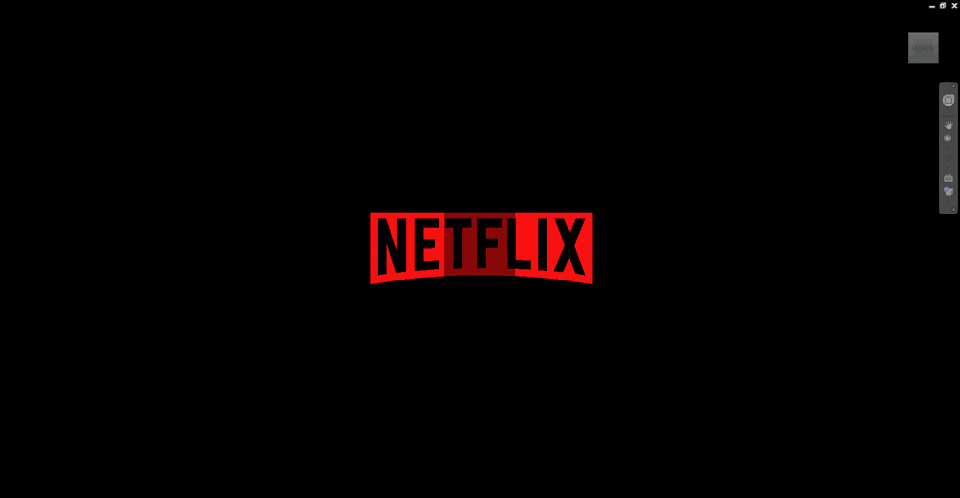

##### **Project Type**    - Unsupervised
##### **Contribution**    -Team
##### **Team Member 1 -** Kaushal Kumar Jha
##### **Team Member 2 -** Shambhu Nath Jha
##### **Team Member 3 -** Nimesh Thakur
##### **Team Member 4 -** Mihir Gupta
##### **Team Member 5-** Asif PA

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
!pip install mapclassify
!pip install geopandas

# Import Libraries
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import math
from scipy.stats import *

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 30.8 MB/s eta 0:00:00


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Numbers of rows in data set are: {df.shape[0]}')
print(f'Numbers of columns in data set are: {df.shape[1]}')

Numbers of rows in data set are: 7787
Numbers of columns in data set are: 12


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

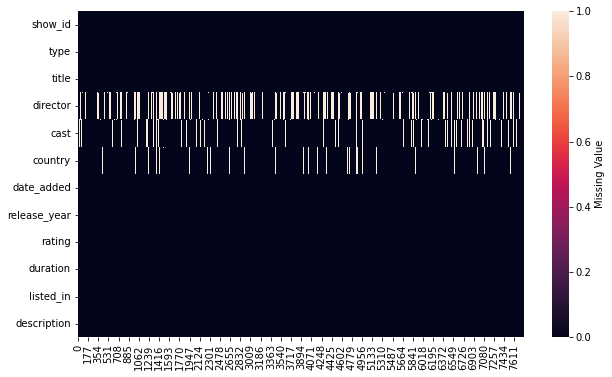

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cbar_kws={'label': 'Missing Value'})
plt.show()

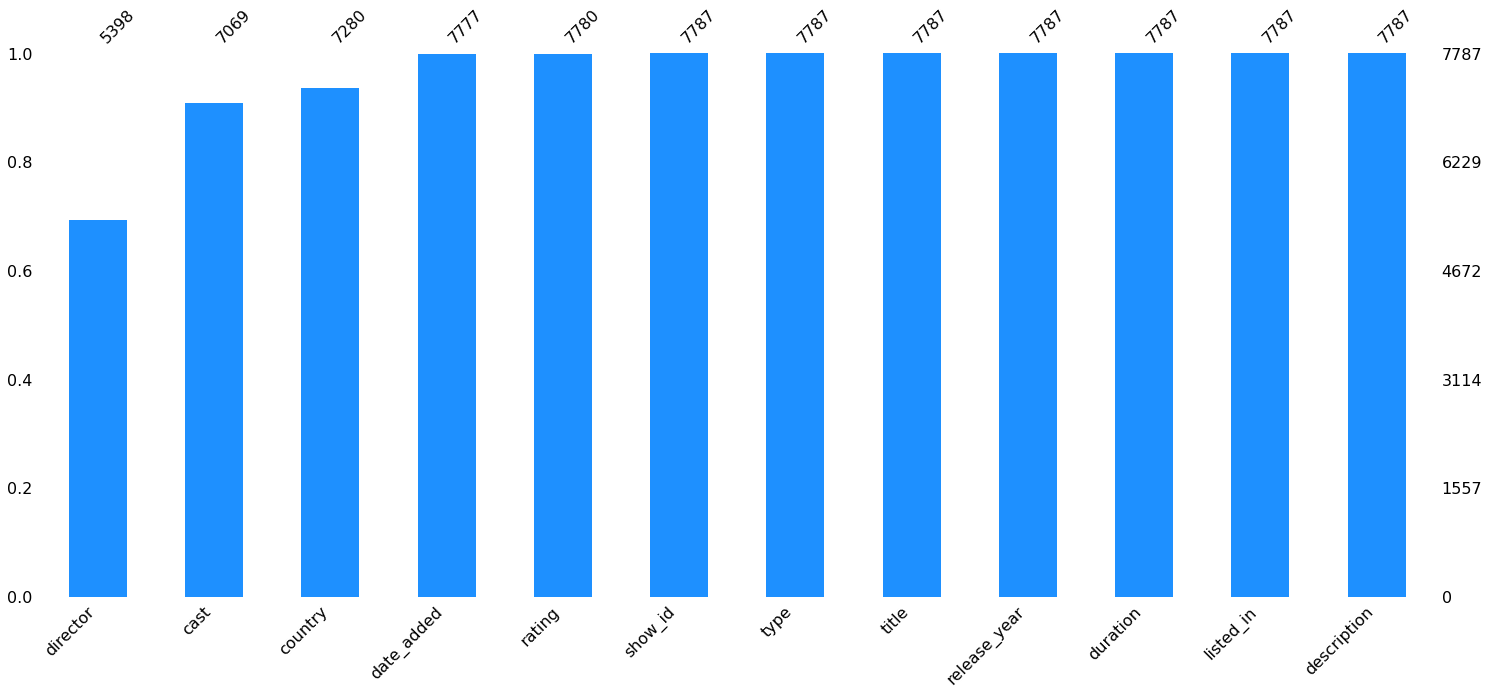

In [11]:
msno.bar(df,color="dodgerblue",sort="ascending")
plt.show()

### What did you know about your dataset?

*   Our dataset contain 7787 rows and 12 columns.
*   Datatype of all variables is object except release_year which is int64.


*   There is no duplicates in dataset
*   Maximum number of null values present in director column followed by cast.





## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description 


*   show_id:Unique ID for every Movie / Tv Show

*   type : Identifier - A Movie or TV Show

*   title : Title of the Movie / Tv Show

*   director : Director of the Movie

*   cast : Actors involved in the movie / show
*   country : Country where the movie / show was produced


*   date_added : Date it was added on Netflix


*   release_year : Actual Releaseyear of the movie / show


*   rating : TV Rating of the movie / show


*   duration : Total Duration - in minutes or number of seasons


*   listed_in : Genere
*   description: The Summary description






### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
#Changing date_added to date time format
df["date_added"] = pd.to_datetime(df['date_added'])
#Extracting Year
df['year_added'] = df['date_added'].dt.year
#Extracting Month
df['month_added'] = df['date_added'].dt.month
#Extracting Day
df['month_added'] = df['date_added'].dt.day

In [16]:
#Seperating TV Show And Movie
netflix_tvshows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [17]:
print(f'shape of netflix_tvshows: {netflix_tvshows.shape}')
print(f'shape of netflix_movies: {netflix_movies.shape}')

shape of netflix_tvshows: (2410, 14)
shape of netflix_movies: (5377, 14)


In [18]:
#Changing the duration format for movies
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [19]:
#Changing duration of tvshows to interger
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Season','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Seasons','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace('s','')
netflix_tvshows['duration']=netflix_tvshows['duration'].astype(str).astype(int)
netflix_tvshows['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2410, dtype: int64

### What all manipulations have you done and insights you found?


*   I have changed the date_added column dtype to datetime format and we have extracted year and month from that and made two seperate columns.
*   Made two seperate dataframe for movies and tvshows.

*   Changed the duration of movies and tvshows dataframe into string.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

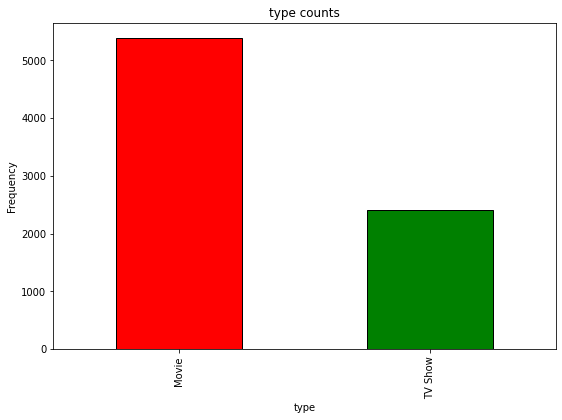

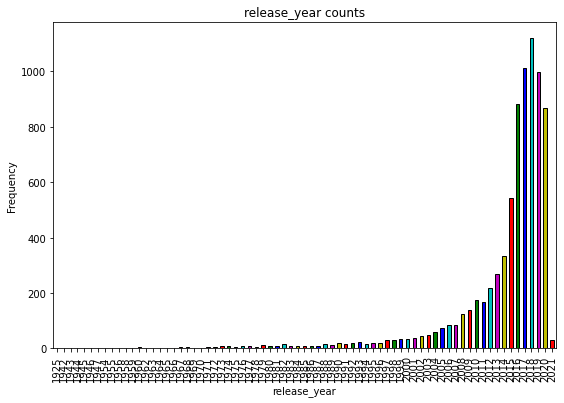

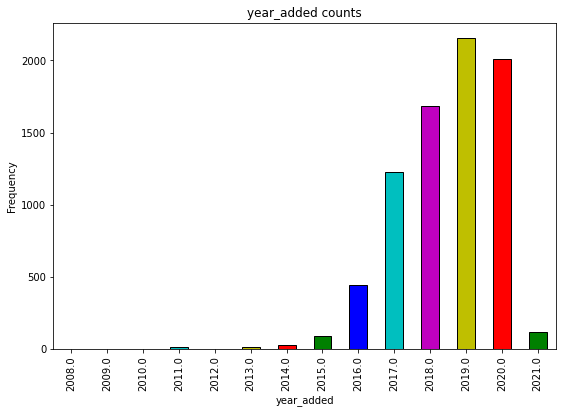

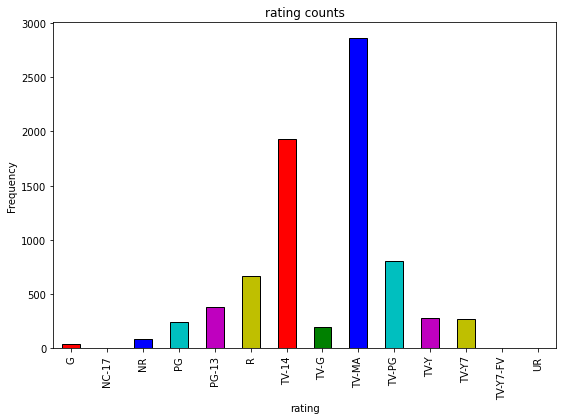

In [20]:
# Chart - 1 visualization code
# copying the relevant dataframe for our observation
relevant_df = df[['type','release_year','year_added','rating']].copy()
# plotting bar graph according to the frequency
for col in relevant_df:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['r','g','b','c','m','y'],edgecolor='black')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

It shows the frequency on type of shows, release year, year added and rating on the content

##### 2. What is/are the insight(s) found from the chart?

TV Shows are less than movies, exponential increase of shows been added also the highest number of shows are rated by TV-MA

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ef885ff40>],
      dtype=object)

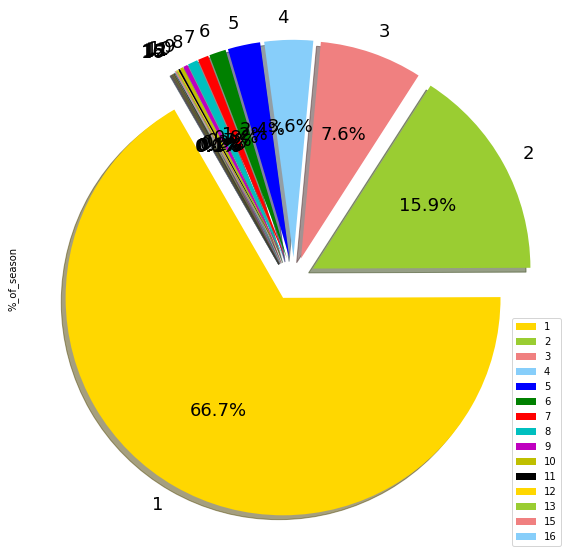

In [21]:
# Chart - 2 visualization 
relevant_df = netflix_tvshows[['type','duration']].copy()
length = len(relevant_df)

relevant_df = relevant_df.groupby('duration').agg(['count'])
relevant_df= relevant_df.droplevel(0,axis=1)

relevant_df.reset_index(inplace = True)
relevant_df['%_of_season'] = ((relevant_df['count']/length)*100)
relevant_df.columns
relevant_df.set_index('duration',inplace = True)
relevant_df.drop('count',axis =1,inplace = True)

# Specifying labels, colours and executing pie chart
labels = ['0 - 40','41 - 50','51 - 60','61 - 70']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','b','g','r','c','m','y','k']
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1)
relevant_df.plot.pie(figsize = (15,10),fontsize = 18,explode=explode, colors=colors,autopct='%1.1f%%', shadow=True,startangle=120,subplots = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [22]:
# Chart - 3 visualization code
# making relevant dataframe for our observation
country = df[df.country != ' '].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country = pd.DataFrame(country.value_counts().reset_index().rename(columns = {'index' : 'name',
                                                                              0 : 'count'}))

# renaming the countries according to realtime stats as available on geopandas
country.replace({'name' : {'West Germany' : 'Germany',
                        'East Germany' : 'Germany',
                        'Soviet Union' : 'Russia',
                        'United States,' : 'United States of America',
                        'United States' : 'United States of America',
                        'United Kingdom,' : 'United Kingdom',
                        'Cambodia,' : 'Cambodia',
                        'Poland,': 'Poland',
                        'Czech Republic' : 'Czechia',
                        'Vatican City' : 'Italy',
                        'Hong Kong' : 'China',
                        'Singapore' : 'Malaysia',
                        'Liechtenstein' : 'Germany',
                        'Cayman Islands' : 'United Kingdom',
                        'Bermuda' : 'United Kingdom'}}, inplace = True)
# let's have a look at our data frame
country

,name,count
0,United States of America,3296
1,India,990
2,United Kingdom,722
3,Canada,412
4,France,349
...,...,...
116,Dominican Republic,1
117,Samoa,1
118,Azerbaijan,1
119,United Kingdom,1


In [23]:
# getting the world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# merging our data with world map
merge = pd.merge(world,country,how = 'left', left_on = 'name', right_on = 'name')
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",412.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3296.0
...,...,...,...,...,...,...,...
185,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7.0
186,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.0
187,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
188,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


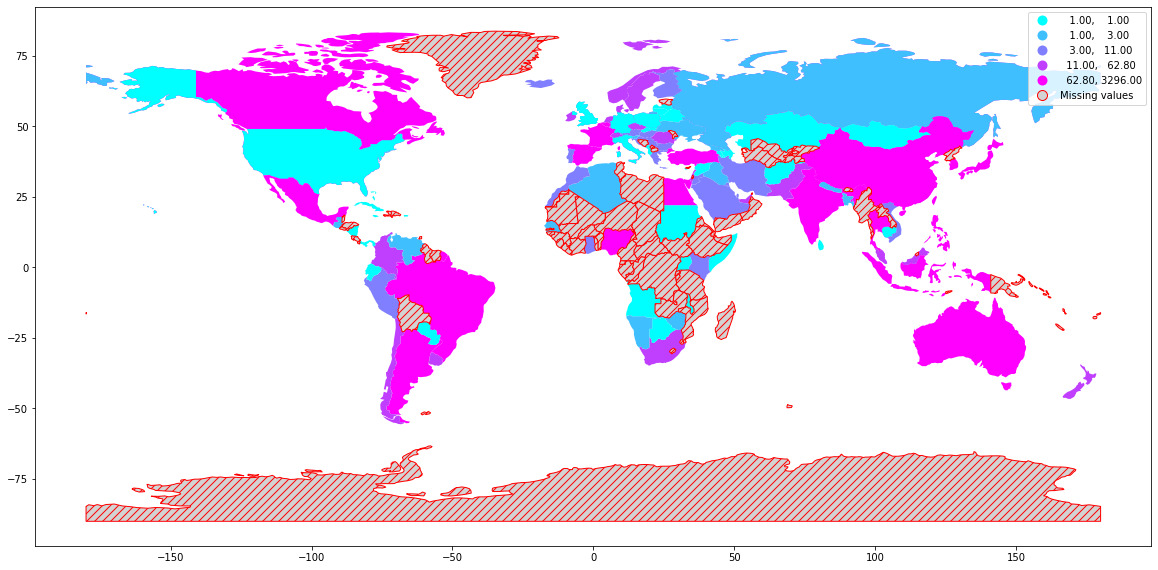

In [24]:
# Plotting our data into the world map
merge.plot(
    column="count",
    legend=True,
    scheme="quantiles",
    cmap='cool',
    figsize=(20,20),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"})


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

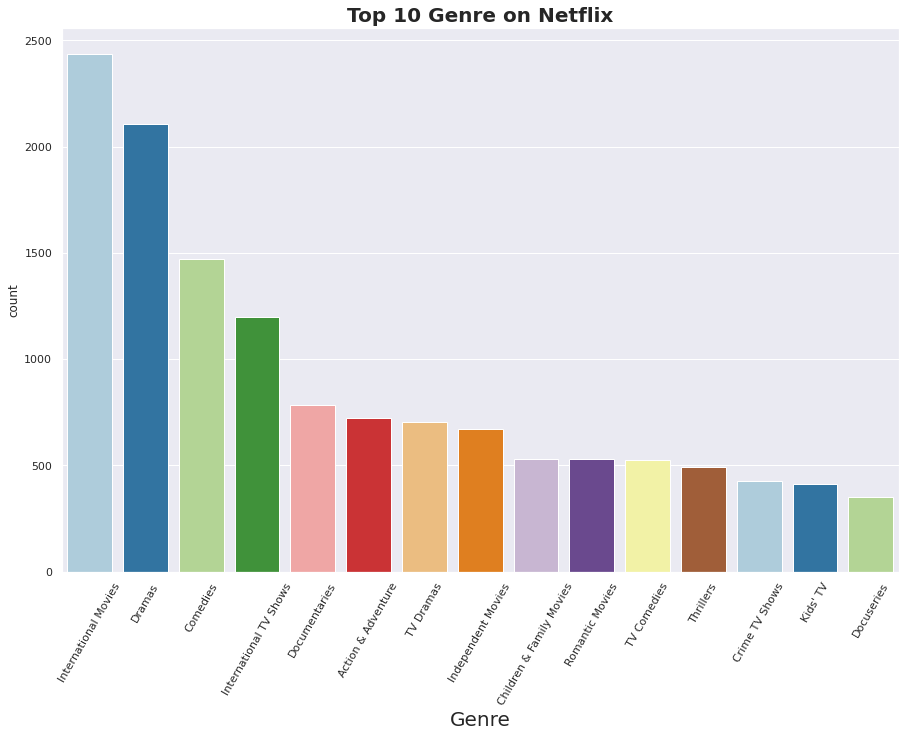

In [25]:
# Chart - 4 visualization code
# Making relevant dataframe for our observation
genre = df[df.listed_in != ' '].set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# setting parameters and plotting bar graph
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x= genre, order=genre.value_counts().index[:15], palette='Paired')
plt.xticks(rotation = 60)
plt.xlabel("Genre",size=20)
plt.title('Top 10 Genre on Netflix',fontsize=20,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [26]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [27]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [28]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [29]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [30]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [31]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [32]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [33]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [34]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

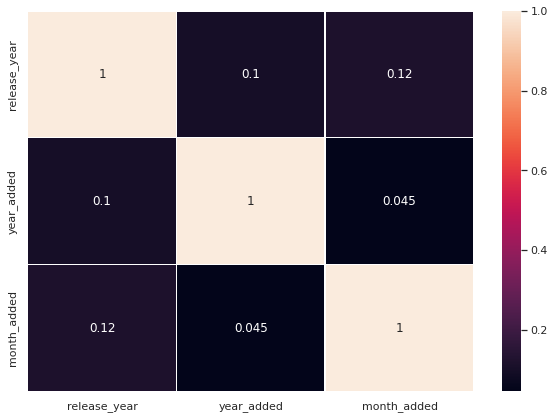

In [35]:
# Correlation Heatmap visualization code
plt.figure (figsize= (10,7))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

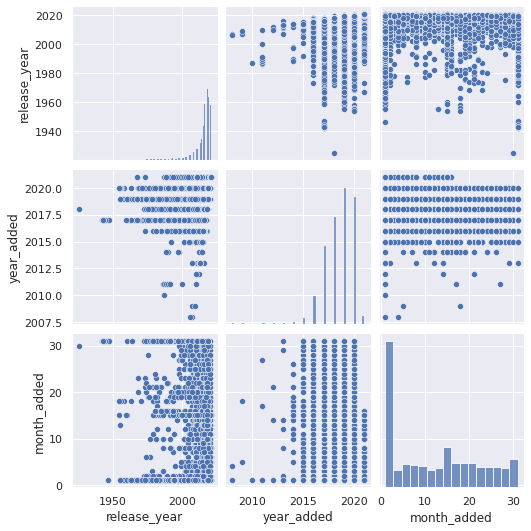

In [36]:
# Pair Plot visualization code
sns.pairplot(data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [37]:
#helper functions 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [38]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
#creating instance of the class
findz = findz()
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"


In [39]:
zcdf = lambda x: norm(0,1).cdf(x)
def p_value(z,tailed):
  z=zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - Atleast 25 percent of shows(movies & TV shows included) consist of International genre

Alternate Hypothesis - Less than 25 percent of shows(movies & TV shows included) consist of International genre

#### 2. Perform an appropriate statistical test.

In [40]:
# Making relevant dataframe for our hypothesis test
relevant_df = genre.copy()
relevant_df = relevant_df.sample(1000,random_state=42)
relevant_df = relevant_df.reset_index()
relevant_df.rename(columns = {0 : 'type'}, inplace = True)
count = relevant_df[relevant_df['type'] == 'International TV Shows'].count()
count = count + relevant_df[relevant_df['type'] == 'International Movies'].count()
count

title    207
type     207
dtype: int64

In [41]:
# Perform Statistical Test to obtain P-Value
val = 207
p_hyp = 0.25
size = 1000
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'l') #left tailed
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0008439436732277457


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - Atmost 20 percent of the shows in netflix are rated as TV-MA

Alternate Hypothesis - More than 20 percent of the shows in netflix are rated as TV-MA

#### 2. Perform an appropriate statistical test.

In [42]:
relevant_df = df['rating'].copy()
relevant_df = relevant_df.sample(1000,random_state = 0)
relevant_df = relevant_df.reset_index()
relevant_df.drop(columns = 'index', inplace = True)
count = relevant_df[relevant_df['rating'] == 'TV-MA'].count()
count

rating    367
dtype: int64

In [43]:
# Perform Statistical Test to obtain P-Value
val = 367
p_hyp = 0.30
size = 1000
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'r') #right tailed
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.8871465897740691e-06


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64

In [45]:
# Handling Missing Values & Missing Value Imputation
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','day_added','year_added','month_added','rating'],inplace=True)

KeyError: ignored

In [ ]:
#Cross-Checking Null values after treatment
df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

*   I have filled the null value in director and cast columns with 'Unknown',because we dont know which movie was directed and casted by whom .

*   Null value of Country column has been filled by mode so that the country having most content on Netflix will come in place of Null value.

*   I have dropped null values of date_added, year_added,month_added,day_added and rating columns because they contain very few number of null values. 



### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

We will be clustering using  Director,Cast,Country,Listed in (genres),Description,Rating attributes.







In [ ]:
#Creating Copy of original dataset too keep original one safe
df1=df.copy()

In [ ]:
# Expand Contraction
#Combing all important attributes in one column
df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description']+' '+df1['rating'])

In [ ]:
df1['clustering_attributes'][20]

#### 2. Lower Casing

In [ ]:
# Lower Casing
df1['clustering_attributes']=df1['clustering_attributes'].str.lower()

In [ ]:
#Cheking the clustering attibutes column after lower casing
df1['clustering_attributes'][20]

We can see that we have succefully lowered the case of clustering attributes.

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Remove punctuation from the text :

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)
df1['clustering_attributes'][20]

**We can see that punctuations have been removed successfully.**

#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

In [ ]:
# Remove Stopwords
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
#Checking Stop words removed or not
df1['clustering_attributes'][20]

**We have successfuly removed all stop words.**

#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function :
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stemming)

In [ ]:
df1['clustering_attributes'][20]

In [ ]:
df1['Length(listed_in)'] =df1['listed_in'].apply(lambda x: len(x))
df1['Length(description)'] =df1['description'].apply(lambda x: len(x))
df1.head()

##### Which text normalization technique have you used and why?

We have used stemming for normalization of text. As Stemming removes last few characters from a word, often leading to incorrect meanings and spelling.

Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon"

#### 6. Text Vectorization

In [ ]:
# Vectorizing Text
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df1['description'])

#shape of tfidf_matrix
tfidf_matrix.shape



##### Which text vectorization technique have you used and why?

We have used TF-IDF vectorization method,TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.

We use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 6. Data Scaling

In [ ]:
# Scaling your data
X_features =df1[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
print(X_features.describe())
X=stdscaler.fit_transform(X_features) #Rescaled X
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]
#Finding Silhouette Score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
     



##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Importance of Dimesionality Reduction:


*   Reduce the complexity of the data

*   Improve model performance

*   Fewer features require less computation time

*   Data will be easy to visualise and interpret 
*   Noise reduction,etc.



In [ ]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
#Variance vs number of componets
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)
x_pca.shape

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used Principal Component Analysis(PCA),PCA is a technique used to reduce the dimensionality of a dataset while retaining as much information as possible. It is often used to simplify data visualization and to identify patterns or relationships in the data

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***